In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
#Importing data
data= np.array(pd.read_csv('Old_Faithful_Dataset.csv', index_col=0))

In [3]:
#Param initialisation
k=2 #clusters
d= data.shape[0] #No. of data pts
assign= np.zeros((data.shape[0], k))  #shape: (d,k)
cluster= np.empty((k, data.shape[1])) #shape: (k, data_dim)
data_range= np.concatenate((np.min(data, axis=0, keepdims=True), np.max(data, axis=0, keepdims=True)), axis=0)  #shape: (2, k)

for i in range(data.shape[1]):
    cluster[:,i] = np.round(np.random.uniform(low= data_range[0,i], high= data_range[1,i], size= k),3)

Initial cluster centers are: [[ 3.521 74.946]
 [ 4.103 71.879]]


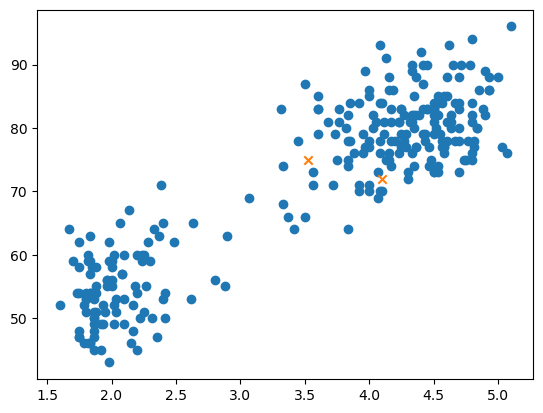

In [4]:
print("Initial cluster centers are:", cluster)

plt.scatter(data[:,0], data[:,1])
plt.scatter(cluster[:,0], cluster[:, 1], marker='x')

In [5]:
#Clustering
def clustering(cluster, data, assign):
    for i in range(d):
        for j in range(k):
            assign[i,j]= np.linalg.norm(data[i] - cluster[j])
    temp= np.zeros(assign.shape)  #shape: (d,k)
    temp[np.arange(assign.shape[0]), np.argmin(assign, axis=1)]=1
    return assign, temp       

In [6]:
#Mean_Recalculation
def re_mean(temp, data):
    new_cluster=np.zeros((k, data.shape[1]))
    index= np.argmax(temp, axis=1)
    for i in range(d):
        new_cluster[index[i]]= new_cluster[index[i]] + data[i]
    new_cluster= new_cluster/ np.sum(temp, axis=0, keepdims=True).T
    return index, new_cluster

Final cluster centres are: [[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


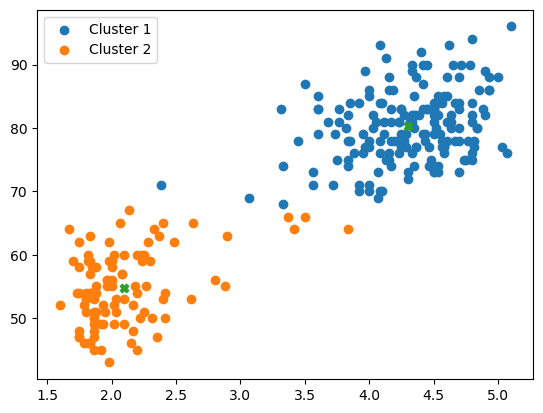

In [7]:
#Till convergence
old_cluster= np.zeros((cluster.shape))
while not np.allclose(cluster, old_cluster, rtol=.1, atol=0):
    old_cluster= cluster
    assign, temp= clustering(cluster, data, assign)
    index, cluster = re_mean(temp, data)

#Plotting clusters
for clusters in np.unique(index):
    cluster_points = data[index == clusters]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {clusters+1}')
plt.scatter(cluster[:,0], cluster[:, 1], marker='X')
plt.legend()

print("Final cluster centres are:", cluster)